In [1]:
import numpy as np
import pandas as pd
import time

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import BatchNormalization,Activation
from keras import optimizers

Using TensorFlow backend.


In [3]:
train = pd.read_csv("../../kaggle/LosAngelesHousePricesForecast/data/train_1.csv")
if 'Unnamed: 0' in train.columns: 
    train = train.drop(['Unnamed: 0'], axis=1)
y = train["SalePrice"]
train1 = train.drop(["Id", "SalePrice"], axis=1)
X = pd.get_dummies(train1).reset_index(drop=True)
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state = 123)  

In [4]:
y_train_log=np.log(y_train)
y_train_wan=y_train/10000
y_test_log=np.log(y_test)
y_test_wan=y_test/10000

In [5]:
def create_model4():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1]))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    #sgd = optimizers.SGD(optimizer='adam',loss='mean_squared_error')
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [6]:
transformer = RobustScaler().fit(X_train)
X_train_norm = transformer.transform(X_train)
X_test_norm = transformer.transform(X_test)

y_train = np.array(y_train).reshape(len(y_train), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)
transformer2 = RobustScaler().fit(y_train)
y_train_norm = transformer2.transform(y_train)
y_test_norm = transformer2.transform(y_test)

In [7]:
model = create_model4()

In [8]:
history = model.fit(X_train_norm, y_train_norm.flatten(),
                    validation_data = (X_test_norm, y_test_norm.flatten()), epochs=500, batch_size=16,verbose=0)

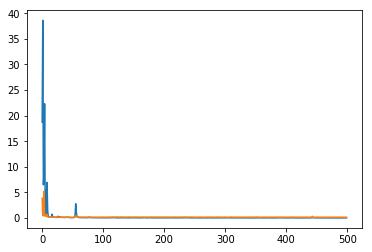

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [10]:
pred = model.predict(X_test_norm)
p = np.array(pred).reshape(len(pred), 1)
pred = transformer2.inverse_transform(p).flatten()

rmse = np.sqrt(mean_squared_error(y_test,pred))
logrmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))
print("RMSE: {} \nLOGRMSE: {}".format(rmse, logrmse))

RMSE: 31232.52541611621 
LOGRMSE: 0.14271757997712056
